In [1]:
#Save con Nodos
import os
from keras.models import load_model
import itertools
from matplotlib import pyplot as plt
from keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import os, sys
dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from sklearn.utils import class_weight
import numpy as np

from evaluation import calculate_metrics
from sklearn.metrics import confusion_matrix,accuracy_score
import pandas as pd
from keras.regularizers import l2
from keras.activations import tanh
from keras.models import Sequential
from keras.layers import *
from keras.losses import categorical_crossentropy,binary_crossentropy
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras import optimizers
from keras import backend as K
from time import time
import random
from random import shuffle,seed
from sklearn.metrics import classification_report
import math
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping
from keras.backend import eval



Using TensorFlow backend.


In [2]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
from sklearn.preprocessing import normalize
import time

def plot_confusion_matrix(cm, target_names, title='Confusion matrix (f1-score)',cmap=None, normalize=True):
    
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [3]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), strides=(1,1)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (5, 5), strides=(1, 1), activation="relu", padding="same"))
model.add(Conv2D(256, (5, 5), strides=(1, 1), activation="relu", padding="same"))
#model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

W0719 02:29:56.892629 140316414314304 deprecation_wrapper.py:119] From /users/mbugueno/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 02:29:56.953380 140316414314304 deprecation_wrapper.py:119] From /users/mbugueno/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 02:29:56.989979 140316414314304 deprecation_wrapper.py:119] From /users/mbugueno/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 02:29:57.041554 140316414314304 deprecation_wrapper.py:119] From /users/mbugueno/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0719 0

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 15, 15, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       819456    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
__________

In [4]:
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.1))
model1.add(Conv2D(128, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model1.add(Conv2D(256, (3, 3), strides=(1, 1), activation="relu", padding="same"))
#model1.add(Flatten())
model1.add(GlobalAveragePooling2D())
model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 15, 15, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
global_average_pooling2d_2 ( (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
__________

In [5]:
fold = "../../KOI_Data/"
df_sets = pd.read_csv(fold+"/koi_sets_unb.csv") 
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
mask_unlabeled = (df_sets["Set"] == "Unlabeled").values
df_sets.head()

KOI Name        Set
0  K00889.01       Test
1  K01009.01      Train
2  K07621.01      Train
3  K06252.01      Train
4  K00958.01  Unlabeled

In [6]:
df_meta = pd.read_csv(fold+"/koi_metadata.csv")
df_meta_train = df_meta[mask_train]
df_meta_test = df_meta[mask_test]
df_meta_unb = df_meta[mask_unlabeled]

df_meta_train.head()

KOI Name NExScI Disposition Kepler Name      Period  \
1  K01009.01     FALSE POSITIVE         NaN    5.092465   
2  K07621.01     FALSE POSITIVE         NaN  275.073650   
3  K06252.01     FALSE POSITIVE         NaN    8.460439   
6  K04162.01     FALSE POSITIVE         NaN    0.539366   
9  K00998.01     FALSE POSITIVE         NaN  161.788327   

   Time of Transit Epoch  First Transit Time (BJD)  Impact Parameter  \
1              357.53594               2455190.536             0.161   
2              315.24860               2455148.249             0.595   
3              133.77449               2454966.774             1.061   
6              131.97457               2454964.975             0.988   
9              214.03900               2455047.039             0.267   

   Duration  Transit Depth    r/R  ...    Teff  log(g)  Metallicity  \
1   3.65900          254.0  0.014  ...  5037.0   4.547        -0.20   
2   3.37000          228.9  0.014  ...  5604.0   4.226        -0.12   
3   4.73492        76412.9  0.478  ...  5951.0   4.638        -1.06   
6   5.43400          145.0  0.016  ...  6341.0   3.301        -0.10   
9   5.31000        87750.0  0.273  ...  6018.0   4.327         0.18   

   Stellar Radius  Stellar Mass  Max single event sigma  Max Multievent sigma  \
1           0.751         0.727                   3.648                15.175   
2           1.187         0.864                   5.909                 8.012   
3           0.702         0.796                 452.526              3704.503   
6           5.302         2.050                   4.847                 9.076   
9           1.212         1.142                 341.666               806.993   

   Transit Model SNR  KOI count  Transit Number  
1               17.1          1             225  
2                7.5          1               4  
3             1797.4          1             164  
6               57.6          1            1239  
9              704.5          1               9  

[5 rows x 31 columns]

In [7]:
kois_train=df_meta_train['KOI Name'].values
labels_train=df_meta_train['NExScI Disposition'].values
kois_val=df_meta_test['KOI Name'].values
labels_val=df_meta_test['NExScI Disposition'].values
kois_test=df_meta_unb['KOI Name'].values
labels_test=df_meta_unb['NExScI Disposition'].values

In [8]:
labels_train[:5]

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

In [9]:
def to_int(labels):
    y_true=[]
    for y in labels:
        if y=='CONFIRMED':
            y_true.append(1)
        else:
            y_true.append(0)
    return y_true

In [36]:
folder_fp='/work/work_teamEXOPLANET/MTF/falsos_positivos/'
folder_c='/work/work_teamEXOPLANET/MTF_gabo/'
falsos=os.listdir(folder_fp)
confirmed=os.listdir(folder_c+'confirmados')
candidates=os.listdir(folder_c+'candidatos')
#load data
x_train=[]
y_train=[]
i=0
for koi in kois_train:
    print ("Cargando objeto", koi, 'con identificador',i, 'es decir, etiqueta', labels_train[i])
    
    if labels_train[i]=='FALSE POSITIVE':
        x_train.append(np.load(folder_fp+koi+'.npy'))
        y_train.append(0)
        try: 
            x_train.append(np.load(folder_c+'falsos_positivos_2/'+koi+'.npy'))
            y_train.append(0)
        except:
            i+=1
            continue
    else:
        x_train.append(np.load(folder_c+'confirmados/'+koi+'.npy'))
        y_train.append(1)
        try:
            x_train.append(np.load(folder_c+'confirmados_2/'+koi+'.npy'))
            y_train.append(1)
        except:
            i+=1
            continue
    i+=1
 

Cargando objeto K01009.01 con identificador 0 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07621.01 con identificador 1 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06252.01 con identificador 2 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04162.01 con identificador 3 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00998.01 con identificador 4 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00992.01 con identificador 5 es decir, etiqueta CONFIRMED
Cargando objeto K00982.01 con identificador 6 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03924.01 con identificador 7 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07623.01 con identificador 8 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00362.01 con identificador 9 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03658.01 con identificador 10 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00993.01 con identificador 11 es decir, etiqueta CONFIRMED
Cargando objeto K00993.02 con identificador 12 e

Cargando objeto K06302.01 con identificador 163 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02540.01 con identificador 164 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07642.01 con identificador 165 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01119.01 con identificador 166 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01119.02 con identificador 167 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00264.01 con identificador 168 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03648.01 con identificador 169 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01091.01 con identificador 170 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06303.01 con identificador 171 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03362.01 con identificador 172 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03373.01 con identificador 173 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06304.01 con identificador 174 es decir, etiqueta FALSE POSITIVE
Cargando objeto 

Cargando objeto K00492.01 con identificador 348 es decir, etiqueta CONFIRMED
Cargando objeto K00968.01 con identificador 349 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03398.01 con identificador 350 es decir, etiqueta CONFIRMED
Cargando objeto K03418.01 con identificador 351 es decir, etiqueta CONFIRMED
Cargando objeto K03308.01 con identificador 352 es decir, etiqueta CONFIRMED
Cargando objeto K03308.02 con identificador 353 es decir, etiqueta CONFIRMED
Cargando objeto K00975.01 con identificador 354 es decir, etiqueta CONFIRMED
Cargando objeto K06103.01 con identificador 355 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00301.01 con identificador 356 es decir, etiqueta CONFIRMED
Cargando objeto K00301.02 con identificador 357 es decir, etiqueta CONFIRMED
Cargando objeto K03010.01 con identificador 358 es decir, etiqueta CONFIRMED
Cargando objeto K00242.01 con identificador 359 es decir, etiqueta CONFIRMED
Cargando objeto K01192.02 con identificador 360 es decir, etiqueta

Cargando objeto K06109.01 con identificador 535 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02202.01 con identificador 536 es decir, etiqueta CONFIRMED
Cargando objeto K07686.01 con identificador 537 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01768.01 con identificador 538 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04046.02 con identificador 539 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01330.01 con identificador 540 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03156.02 con identificador 541 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03156.04 con identificador 542 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01334.01 con identificador 543 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06110.01 con identificador 544 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04468.01 con identificador 545 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01860.04 con identificador 546 es decir, etiqueta FALSE POSITIVE
Cargando objeto K0639

Cargando objeto K03691.01 con identificador 718 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00109.01 con identificador 719 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06445.01 con identificador 720 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00497.02 con identificador 721 es decir, etiqueta CONFIRMED
Cargando objeto K06447.01 con identificador 722 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06448.01 con identificador 723 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05084.01 con identificador 724 es decir, etiqueta CONFIRMED
Cargando objeto K01455.01 con identificador 725 es decir, etiqueta FALSE POSITIVE
Cargando objeto K08097.01 con identificador 726 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02077.01 con identificador 727 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05086.01 con identificador 728 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04058.01 con identificador 729 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02243.01 

Cargando objeto K06536.01 con identificador 907 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03638.01 con identificador 908 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01669.01 con identificador 909 es decir, etiqueta CONFIRMED
Cargando objeto K07720.01 con identificador 910 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02693.01 con identificador 911 es decir, etiqueta CONFIRMED
Cargando objeto K02693.02 con identificador 912 es decir, etiqueta CONFIRMED
Cargando objeto K02693.03 con identificador 913 es decir, etiqueta CONFIRMED
Cargando objeto K03492.01 con identificador 914 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03637.01 con identificador 915 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01580.01 con identificador 916 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03940.01 con identificador 917 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05138.01 con identificador 918 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06540.01 con identi

Cargando objeto K06589.01 con identificador 1110 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02707.01 con identificador 1111 es decir, etiqueta CONFIRMED
Cargando objeto K02707.03 con identificador 1112 es decir, etiqueta CONFIRMED
Cargando objeto K03904.01 con identificador 1113 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02701.01 con identificador 1114 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00836.01 con identificador 1115 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03772.01 con identificador 1116 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01930.01 con identificador 1117 es decir, etiqueta CONFIRMED
Cargando objeto K01930.04 con identificador 1118 es decir, etiqueta CONFIRMED
Cargando objeto K06591.01 con identificador 1119 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07731.01 con identificador 1120 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02591.01 con identificador 1121 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02990.0

Cargando objeto K03422.01 con identificador 1319 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01034.01 con identificador 1320 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03426.01 con identificador 1321 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04063.01 con identificador 1322 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00008.01 con identificador 1323 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07563.01 con identificador 1324 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04016.01 con identificador 1325 es decir, etiqueta CONFIRMED
Cargando objeto K02031.01 con identificador 1326 es decir, etiqueta CONFIRMED
Cargando objeto K00654.02 con identificador 1327 es decir, etiqueta CONFIRMED
Cargando objeto K06636.01 con identificador 1328 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03947.01 con identificador 1329 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06139.01 con identificador 1330 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07

Cargando objeto K00659.01 con identificador 1432 es decir, etiqueta CONFIRMED
Cargando objeto K04553.01 con identificador 1433 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04131.01 con identificador 1434 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06667.01 con identificador 1435 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03932.01 con identificador 1436 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03605.01 con identificador 1437 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05241.01 con identificador 1438 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06668.01 con identificador 1439 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01062.01 con identificador 1440 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06669.01 con identificador 1441 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06022.01 con identificador 1442 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06670.01 con identificador 1443 es decir, etiqueta FALSE POSITIVE
Cargando 

Cargando objeto K02889.01 con identificador 1551 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06692.01 con identificador 1552 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06693.01 con identificador 1553 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06694.01 con identificador 1554 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03456.01 con identificador 1555 es decir, etiqueta CONFIRMED
Cargando objeto K00662.01 con identificador 1556 es decir, etiqueta CONFIRMED
Cargando objeto K01123.01 con identificador 1557 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05274.01 con identificador 1558 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06696.01 con identificador 1559 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05275.01 con identificador 1560 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03356.01 con identificador 1561 es decir, etiqueta CONFIRMED
Cargando objeto K07777.01 con identificador 1562 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06

Cargando objeto K02721.01 con identificador 1671 es decir, etiqueta CONFIRMED
Cargando objeto K00857.01 con identificador 1672 es decir, etiqueta CONFIRMED
Cargando objeto K00857.02 con identificador 1673 es decir, etiqueta CONFIRMED
Cargando objeto K03237.01 con identificador 1674 es decir, etiqueta CONFIRMED
Cargando objeto K07787.01 con identificador 1675 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06735.01 con identificador 1676 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04082.01 con identificador 1677 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06736.01 con identificador 1678 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04722.01 con identificador 1679 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05300.01 con identificador 1680 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06737.01 con identificador 1681 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06738.01 con identificador 1682 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00858.0

Cargando objeto K06773.01 con identificador 1791 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02649.01 con identificador 1792 es decir, etiqueta CONFIRMED
Cargando objeto K08127.01 con identificador 1793 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01349.01 con identificador 1794 es decir, etiqueta FALSE POSITIVE
Cargando objeto K08128.01 con identificador 1795 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00201.01 con identificador 1796 es decir, etiqueta CONFIRMED
Cargando objeto K00864.01 con identificador 1797 es decir, etiqueta CONFIRMED
Cargando objeto K00864.02 con identificador 1798 es decir, etiqueta CONFIRMED
Cargando objeto K00070.01 con identificador 1799 es decir, etiqueta CONFIRMED
Cargando objeto K00070.02 con identificador 1800 es decir, etiqueta CONFIRMED
Cargando objeto K00070.03 con identificador 1801 es decir, etiqueta CONFIRMED
Cargando objeto K00070.05 con identificador 1802 es decir, etiqueta CONFIRMED
Cargando objeto K03244.01 con identificador 

Cargando objeto K06809.01 con identificador 1911 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07576.01 con identificador 1912 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07577.01 con identificador 1913 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02339.01 con identificador 1914 es decir, etiqueta CONFIRMED
Cargando objeto K06813.01 con identificador 1915 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06814.01 con identificador 1916 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01347.01 con identificador 1917 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04020.01 con identificador 1918 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00671.02 con identificador 1919 es decir, etiqueta CONFIRMED
Cargando objeto K00671.03 con identificador 1920 es decir, etiqueta CONFIRMED
Cargando objeto K00671.04 con identificador 1921 es decir, etiqueta CONFIRMED
Cargando objeto K04608.01 con identificador 1922 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01939.0

Cargando objeto K03775.01 con identificador 2032 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01350.01 con identificador 2033 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01700.01 con identificador 2034 es decir, etiqueta CONFIRMED
Cargando objeto K00019.01 con identificador 2035 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02292.01 con identificador 2036 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06034.01 con identificador 2037 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02051.01 con identificador 2038 es decir, etiqueta CONFIRMED
Cargando objeto K01961.01 con identificador 2039 es decir, etiqueta CONFIRMED
Cargando objeto K00456.01 con identificador 2040 es decir, etiqueta CONFIRMED
Cargando objeto K00456.02 con identificador 2041 es decir, etiqueta CONFIRMED
Cargando objeto K00876.01 con identificador 2042 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01979.01 con identificador 2043 es decir, etiqueta CONFIRMED
Cargando objeto K00674.01 con iden

Cargando objeto K06885.01 con identificador 2151 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02465.01 con identificador 2152 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02302.01 con identificador 2153 es decir, etiqueta CONFIRMED
Cargando objeto K01469.01 con identificador 2154 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01518.01 con identificador 2155 es decir, etiqueta CONFIRMED
Cargando objeto K00888.01 con identificador 2156 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03097.02 con identificador 2157 es decir, etiqueta CONFIRMED
Cargando objeto K03097.03 con identificador 2158 es decir, etiqueta CONFIRMED
Cargando objeto K06887.01 con identificador 2159 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01748.01 con identificador 2160 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00568.01 con identificador 2161 es decir, etiqueta CONFIRMED
Cargando objeto K00568.02 con identificador 2162 es decir, etiqueta CONFIRMED
Cargando objeto K04295.01 con iden

Cargando objeto K04075.01 con identificador 2254 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04415.01 con identificador 2255 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00131.01 con identificador 2256 es decir, etiqueta CONFIRMED
Cargando objeto K02523.01 con identificador 2257 es decir, etiqueta CONFIRMED
Cargando objeto K06163.01 con identificador 2258 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04903.01 con identificador 2259 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05427.01 con identificador 2260 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02247.01 con identificador 2261 es decir, etiqueta CONFIRMED
Cargando objeto K08145.01 con identificador 2262 es decir, etiqueta FALSE POSITIVE
Cargando objeto K08145.02 con identificador 2263 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01482.01 con identificador 2264 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03665.01 con identificador 2265 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00

Cargando objeto K01867.01 con identificador 2473 es decir, etiqueta CONFIRMED
Cargando objeto K01867.02 con identificador 2474 es decir, etiqueta CONFIRMED
Cargando objeto K02209.01 con identificador 2475 es decir, etiqueta CONFIRMED
Cargando objeto K01017.01 con identificador 2476 es decir, etiqueta CONFIRMED
Cargando objeto K00960.01 con identificador 2477 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01016.01 con identificador 2478 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03624.01 con identificador 2479 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04196.01 con identificador 2480 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02359.01 con identificador 2481 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05483.01 con identificador 2482 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00905.01 con identificador 2483 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03255.01 con identificador 2484 es decir, etiqueta CONFIRMED
Cargando objeto K06986.01 con

Cargando objeto K07020.01 con identificador 2586 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01137.01 con identificador 2587 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00573.01 con identificador 2588 es decir, etiqueta CONFIRMED
Cargando objeto K02385.01 con identificador 2589 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07021.01 con identificador 2590 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01141.01 con identificador 2591 es decir, etiqueta CONFIRMED
Cargando objeto K00122.01 con identificador 2592 es decir, etiqueta CONFIRMED
Cargando objeto K01146.01 con identificador 2593 es decir, etiqueta CONFIRMED
Cargando objeto K00420.01 con identificador 2594 es decir, etiqueta CONFIRMED
Cargando objeto K00574.01 con identificador 2595 es decir, etiqueta CONFIRMED
Cargando objeto K00574.02 con identificador 2596 es decir, etiqueta CONFIRMED
Cargando objeto K03424.01 con identificador 2597 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00127.01 con identific

Cargando objeto K03941.01 con identificador 2706 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01792.01 con identificador 2707 es decir, etiqueta CONFIRMED
Cargando objeto K01792.03 con identificador 2708 es decir, etiqueta CONFIRMED
Cargando objeto K07055.01 con identificador 2709 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07056.01 con identificador 2710 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03315.01 con identificador 2711 es decir, etiqueta CONFIRMED
Cargando objeto K02027.01 con identificador 2712 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07895.01 con identificador 2713 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00692.02 con identificador 2714 es decir, etiqueta CONFIRMED
Cargando objeto K00577.02 con identificador 2715 es decir, etiqueta CONFIRMED
Cargando objeto K02488.01 con identificador 2716 es decir, etiqueta CONFIRMED
Cargando objeto K00139.01 con identificador 2717 es decir, etiqueta CONFIRMED
Cargando objeto K00139.02 con identific

Cargando objeto K07908.01 con identificador 2826 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05564.01 con identificador 2827 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03716.01 con identificador 2828 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03716.02 con identificador 2829 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03506.01 con identificador 2830 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07081.01 con identificador 2831 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03527.01 con identificador 2832 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02842.01 con identificador 2833 es decir, etiqueta CONFIRMED
Cargando objeto K02842.02 con identificador 2834 es decir, etiqueta CONFIRMED
Cargando objeto K02842.03 con identificador 2835 es decir, etiqueta CONFIRMED
Cargando objeto K07082.01 con identificador 2836 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01252.01 con identificador 2837 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07

Cargando objeto K07110.01 con identificador 2945 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02517.01 con identificador 2946 es decir, etiqueta CONFIRMED
Cargando objeto K00322.01 con identificador 2947 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01387.01 con identificador 2948 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02038.01 con identificador 2949 es decir, etiqueta CONFIRMED
Cargando objeto K02038.02 con identificador 2950 es decir, etiqueta CONFIRMED
Cargando objeto K02038.03 con identificador 2951 es decir, etiqueta CONFIRMED
Cargando objeto K06062.01 con identificador 2952 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07916.01 con identificador 2953 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04332.01 con identificador 2954 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07113.01 con identificador 2955 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07114.01 con identificador 2956 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04471.0

Cargando objeto K03044.01 con identificador 3062 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02625.01 con identificador 3063 es decir, etiqueta CONFIRMED
Cargando objeto K06195.01 con identificador 3064 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00526.01 con identificador 3065 es decir, etiqueta CONFIRMED
Cargando objeto K01400.01 con identificador 3066 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02566.01 con identificador 3067 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03877.01 con identificador 3068 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00930.01 con identificador 3069 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07138.01 con identificador 3070 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03898.01 con identificador 3071 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00703.01 con identificador 3072 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07139.01 con identificador 3073 es decir, etiqueta FALSE POSITIVE
Cargando objet

Cargando objeto K00271.03 con identificador 3201 es decir, etiqueta CONFIRMED
Cargando objeto K01813.01 con identificador 3202 es decir, etiqueta CONFIRMED
Cargando objeto K01396.01 con identificador 3203 es decir, etiqueta CONFIRMED
Cargando objeto K01396.02 con identificador 3204 es decir, etiqueta CONFIRMED
Cargando objeto K02246.01 con identificador 3205 es decir, etiqueta CONFIRMED
Cargando objeto K00707.01 con identificador 3206 es decir, etiqueta CONFIRMED
Cargando objeto K00707.02 con identificador 3207 es decir, etiqueta CONFIRMED
Cargando objeto K00707.04 con identificador 3208 es decir, etiqueta CONFIRMED
Cargando objeto K00707.05 con identificador 3209 es decir, etiqueta CONFIRMED
Cargando objeto K07175.01 con identificador 3210 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02786.01 con identificador 3211 es decir, etiqueta CONFIRMED
Cargando objeto K00939.01 con identificador 3212 es decir, etiqueta CONFIRMED
Cargando objeto K00939.02 con identificador 3213 es decir, 

Cargando objeto K07948.01 con identificador 3332 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04684.01 con identificador 3333 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00945.03 con identificador 3334 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00587.01 con identificador 3335 es decir, etiqueta CONFIRMED
Cargando objeto K02685.01 con identificador 3336 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03601.01 con identificador 3337 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07204.01 con identificador 3338 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00022.01 con identificador 3339 es decir, etiqueta CONFIRMED
Cargando objeto K01451.01 con identificador 3340 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07206.01 con identificador 3341 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03618.01 con identificador 3342 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02892.01 con identificador 3343 es decir, etiqueta FALSE POSITIVE
Cargando objet

Cargando objeto K02586.01 con identificador 3467 es decir, etiqueta CONFIRMED
Cargando objeto K04192.01 con identificador 3468 es decir, etiqueta CONFIRMED
Cargando objeto K01998.01 con identificador 3469 es decir, etiqueta CONFIRMED
Cargando objeto K03457.01 con identificador 3470 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00715.01 con identificador 3471 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01958.01 con identificador 3472 es decir, etiqueta CONFIRMED
Cargando objeto K03529.01 con identificador 3473 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02937.01 con identificador 3474 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03442.01 con identificador 3475 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02715.01 con identificador 3476 es decir, etiqueta CONFIRMED
Cargando objeto K02461.01 con identificador 3477 es decir, etiqueta CONFIRMED
Cargando objeto K08187.01 con identificador 3478 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05717.01 con iden

Cargando objeto K06075.01 con identificador 3615 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01875.01 con identificador 3616 es decir, etiqueta CONFIRMED
Cargando objeto K01875.02 con identificador 3617 es decir, etiqueta CONFIRMED
Cargando objeto K00425.01 con identificador 3618 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07268.01 con identificador 3619 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02018.01 con identificador 3620 es decir, etiqueta CONFIRMED
Cargando objeto K01966.01 con identificador 3621 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03382.01 con identificador 3622 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02205.01 con identificador 3623 es decir, etiqueta CONFIRMED
Cargando objeto K02644.01 con identificador 3624 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03470.02 con identificador 3625 es decir, etiqueta CONFIRMED
Cargando objeto K07269.01 con identificador 3626 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05750.01 con

Cargando objeto K00732.01 con identificador 3758 es decir, etiqueta CONFIRMED
Cargando objeto K07996.01 con identificador 3759 es decir, etiqueta FALSE POSITIVE
Cargando objeto K08202.01 con identificador 3760 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03773.01 con identificador 3761 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00733.01 con identificador 3762 es decir, etiqueta CONFIRMED
Cargando objeto K00733.02 con identificador 3763 es decir, etiqueta CONFIRMED
Cargando objeto K00733.03 con identificador 3764 es decir, etiqueta CONFIRMED
Cargando objeto K04048.01 con identificador 3765 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00734.01 con identificador 3766 es decir, etiqueta CONFIRMED
Cargando objeto K01074.01 con identificador 3767 es decir, etiqueta CONFIRMED
Cargando objeto K07303.01 con identificador 3768 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03606.01 con identificador 3769 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02810.01 con iden

Cargando objeto K00746.01 con identificador 3906 es decir, etiqueta CONFIRMED
Cargando objeto K04261.01 con identificador 3907 es decir, etiqueta CONFIRMED
Cargando objeto K01162.01 con identificador 3908 es decir, etiqueta CONFIRMED
Cargando objeto K02208.01 con identificador 3909 es decir, etiqueta CONFIRMED
Cargando objeto K08292.01 con identificador 3910 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05801.02 con identificador 3911 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07337.01 con identificador 3912 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07338.01 con identificador 3913 es decir, etiqueta FALSE POSITIVE
Cargando objeto K08021.01 con identificador 3914 es decir, etiqueta FALSE POSITIVE
Cargando objeto K08023.01 con identificador 3915 es decir, etiqueta FALSE POSITIVE
Cargando objeto K08024.01 con identificador 3916 es decir, etiqueta FALSE POSITIVE
Cargando objeto K08025.01 con identificador 3917 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01301.0

Cargando objeto K04470.01 con identificador 4050 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05832.01 con identificador 4051 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02736.01 con identificador 4052 es decir, etiqueta CONFIRMED
Cargando objeto K01287.01 con identificador 4053 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00431.01 con identificador 4054 es decir, etiqueta CONFIRMED
Cargando objeto K00431.02 con identificador 4055 es decir, etiqueta CONFIRMED
Cargando objeto K03602.01 con identificador 4056 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07379.01 con identificador 4057 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00754.01 con identificador 4058 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07381.01 con identificador 4059 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02104.01 con identificador 4060 es decir, etiqueta CONFIRMED
Cargando objeto K00755.01 con identificador 4061 es decir, etiqueta CONFIRMED
Cargando objeto K01309.01 con

Cargando objeto K02533.01 con identificador 4179 es decir, etiqueta CONFIRMED
Cargando objeto K02198.01 con identificador 4180 es decir, etiqueta CONFIRMED
Cargando objeto K00292.01 con identificador 4181 es decir, etiqueta CONFIRMED
Cargando objeto K05862.01 con identificador 4182 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04645.01 con identificador 4183 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07407.01 con identificador 4184 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02442.02 con identificador 4185 es decir, etiqueta CONFIRMED
Cargando objeto K00124.02 con identificador 4186 es decir, etiqueta CONFIRMED
Cargando objeto K08218.01 con identificador 4187 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02977.01 con identificador 4188 es decir, etiqueta CONFIRMED
Cargando objeto K02977.02 con identificador 4189 es decir, etiqueta CONFIRMED
Cargando objeto K00538.01 con identificador 4190 es decir, etiqueta CONFIRMED
Cargando objeto K03326.01 con identificador 

Cargando objeto K02195.02 con identificador 4303 es decir, etiqueta CONFIRMED
Cargando objeto K02195.03 con identificador 4304 es decir, etiqueta CONFIRMED
Cargando objeto K02454.01 con identificador 4305 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05894.01 con identificador 4306 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07443.01 con identificador 4307 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00173.01 con identificador 4308 es decir, etiqueta CONFIRMED
Cargando objeto K03561.01 con identificador 4309 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06085.01 con identificador 4310 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06086.01 con identificador 4311 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07444.01 con identificador 4312 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02171.01 con identificador 4313 es decir, etiqueta CONFIRMED
Cargando objeto K01885.01 con identificador 4314 es decir, etiqueta CONFIRMED
Cargando objeto K02836.01 con

Cargando objeto K00435.01 con identificador 4439 es decir, etiqueta CONFIRMED
Cargando objeto K00435.03 con identificador 4440 es decir, etiqueta CONFIRMED
Cargando objeto K00435.04 con identificador 4441 es decir, etiqueta CONFIRMED
Cargando objeto K00435.05 con identificador 4442 es decir, etiqueta CONFIRMED
Cargando objeto K00435.06 con identificador 4443 es decir, etiqueta CONFIRMED
Cargando objeto K01832.01 con identificador 4444 es decir, etiqueta CONFIRMED
Cargando objeto K01832.02 con identificador 4445 es decir, etiqueta CONFIRMED
Cargando objeto K01832.03 con identificador 4446 es decir, etiqueta CONFIRMED
Cargando objeto K03001.01 con identificador 4447 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03115.01 con identificador 4448 es decir, etiqueta CONFIRMED
Cargando objeto K07475.01 con identificador 4449 es decir, etiqueta FALSE POSITIVE
Cargando objeto K08064.01 con identificador 4450 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06244.01 con identificador 4451 

Cargando objeto K02388.01 con identificador 4580 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07512.01 con identificador 4581 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00359.01 con identificador 4582 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03895.01 con identificador 4583 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04297.01 con identificador 4584 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04540.01 con identificador 4585 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01492.01 con identificador 4586 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04592.01 con identificador 4587 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03765.01 con identificador 4588 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02665.01 con identificador 4589 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00786.01 con identificador 4590 es decir, etiqueta CONFIRMED
Cargando objeto K02155.01 con identificador 4591 es decir, etiqueta CONFIRMED
Cargando objet

In [37]:
x_val=[]
y_val=[]
i=0
for koi in kois_val:
    print ("Cargando objeto", koi, 'con identificador',i, 'es decir, etiqueta', labels_train[i])
    if labels_val[i]=='FALSE POSITIVE':
        x_val.append(np.load(folder_fp+koi+'.npy'))
        y_val.append(0)
        try: 
            x_val.append(np.load(folder_c+'falsos_positivos_2/'+koi+'.npy'))
            y_val.append(0)
        except:
            i+=1
            continue
    else:
        x_val.append(np.load(folder_c+'confirmados/'+koi+'.npy'))
        y_val.append(1)
        try:
            x_val.append(np.load(folder_c+'confirmados_2/'+koi+'.npy'))
            y_val.append(1)
        except:
            i+=1
            continue
    i+=1

Cargando objeto K00889.01 con identificador 0 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07622.01 con identificador 1 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04924.01 con identificador 2 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01002.01 con identificador 3 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03351.01 con identificador 4 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02534.01 con identificador 5 es decir, etiqueta CONFIRMED
Cargando objeto K04929.01 con identificador 6 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02178.01 con identificador 7 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06093.01 con identificador 8 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01987.01 con identificador 9 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07627.01 con identificador 10 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04934.01 con identificador 11 es decir, etiqueta CONFIRMED
Cargando objeto K03735.01 con identificador 12 e

Cargando objeto K01180.01 con identificador 184 es decir, etiqueta CONFIRMED
Cargando objeto K00969.01 con identificador 185 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02013.01 con identificador 186 es decir, etiqueta CONFIRMED
Cargando objeto K03912.01 con identificador 187 es decir, etiqueta CONFIRMED
Cargando objeto K02731.01 con identificador 188 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02239.01 con identificador 189 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06386.01 con identificador 190 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01339.01 con identificador 191 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04033.01 con identificador 192 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07684.01 con identificador 193 es decir, etiqueta CONFIRMED
Cargando objeto K02210.01 con identificador 194 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00281.01 con identificador 195 es decir, etiqueta CONFIRMED
Cargando objeto K01791.01 con identificad

Cargando objeto K04573.01 con identificador 288 es decir, etiqueta CONFIRMED
Cargando objeto K04688.01 con identificador 289 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07710.01 con identificador 290 es decir, etiqueta CONFIRMED
Cargando objeto K06461.01 con identificador 291 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01884.01 con identificador 292 es decir, etiqueta CONFIRMED
Cargando objeto K04695.01 con identificador 293 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00500.04 con identificador 294 es decir, etiqueta CONFIRMED
Cargando objeto K02844.01 con identificador 295 es decir, etiqueta CONFIRMED
Cargando objeto K00634.01 con identificador 296 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06464.01 con identificador 297 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06467.01 con identificador 298 es decir, etiqueta CONFIRMED
Cargando objeto K04717.01 con identificador 299 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05997.01 con identificador 30

Cargando objeto K06129.01 con identificador 391 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06006.01 con identificador 392 es decir, etiqueta CONFIRMED
Cargando objeto K06575.01 con identificador 393 es decir, etiqueta CONFIRMED
Cargando objeto K01836.01 con identificador 394 es decir, etiqueta CONFIRMED
Cargando objeto K07726.01 con identificador 395 es decir, etiqueta CONFIRMED
Cargando objeto K02510.01 con identificador 396 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03292.01 con identificador 397 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00834.02 con identificador 398 es decir, etiqueta CONFIRMED
Cargando objeto K01567.02 con identificador 399 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01567.03 con identificador 400 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02713.01 con identificador 401 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04064.01 con identificador 402 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01778.01 con identificad

Cargando objeto K01055.01 con identificador 494 es decir, etiqueta FALSE POSITIVE
Cargando objeto K08258.01 con identificador 495 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00414.02 con identificador 496 es decir, etiqueta CONFIRMED
Cargando objeto K03331.01 con identificador 497 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00843.01 con identificador 498 es decir, etiqueta CONFIRMED
Cargando objeto K05209.01 con identificador 499 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00654.01 con identificador 500 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03947.02 con identificador 501 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06637.01 con identificador 502 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01052.03 con identificador 503 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04726.01 con identificador 504 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01053.01 con identificador 505 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02498.01 

Cargando objeto K07580.01 con identificador 698 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04866.01 con identificador 699 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06829.01 con identificador 700 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06830.01 con identificador 701 es decir, etiqueta CONFIRMED
Cargando objeto K00566.01 con identificador 702 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06832.01 con identificador 703 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01699.01 con identificador 704 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03299.01 con identificador 705 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07821.01 con identificador 706 es decir, etiqueta CONFIRMED
Cargando objeto K01346.01 con identificador 707 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07824.01 con identificador 708 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06843.01 con identificador 709 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07825.01 

Cargando objeto K00896.02 con identificador 802 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00171.02 con identificador 803 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04412.01 con identificador 804 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00897.01 con identificador 805 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03360.01 con identificador 806 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00202.01 con identificador 807 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03816.01 con identificador 808 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07852.01 con identificador 809 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06928.01 con identificador 810 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05439.01 con identificador 811 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06929.01 con identificador 812 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03300.01 con identificador 813 es decir, etiqueta FALSE POSITIVE
Cargando objeto 

Cargando objeto K00573.02 con identificador 905 es decir, etiqueta CONFIRMED
Cargando objeto K07881.01 con identificador 906 es decir, etiqueta CONFIRMED
Cargando objeto K07022.01 con identificador 907 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02929.01 con identificador 908 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06056.01 con identificador 909 es decir, etiqueta CONFIRMED
Cargando objeto K00575.01 con identificador 910 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07883.01 con identificador 911 es decir, etiqueta CONFIRMED
Cargando objeto K07029.01 con identificador 912 es decir, etiqueta CONFIRMED
Cargando objeto K02145.01 con identificador 913 es decir, etiqueta CONFIRMED
Cargando objeto K04017.01 con identificador 914 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07031.01 con identificador 915 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00152.03 con identificador 916 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00116.04 con identificador 91

Cargando objeto K02972.02 con identificador 1008 es decir, etiqueta CONFIRMED
Cargando objeto K02038.04 con identificador 1009 es decir, etiqueta CONFIRMED
Cargando objeto K01412.01 con identificador 1010 es decir, etiqueta CONFIRMED
Cargando objeto K01383.01 con identificador 1011 es decir, etiqueta CONFIRMED
Cargando objeto K01391.01 con identificador 1012 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00700.03 con identificador 1013 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00159.01 con identificador 1014 es decir, etiqueta CONFIRMED
Cargando objeto K03227.01 con identificador 1015 es decir, etiqueta CONFIRMED
Cargando objeto K01874.02 con identificador 1016 es decir, etiqueta CONFIRMED
Cargando objeto K07120.01 con identificador 1017 es decir, etiqueta CONFIRMED
Cargando objeto K02169.01 con identificador 1018 es decir, etiqueta CONFIRMED
Cargando objeto K01413.02 con identificador 1019 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00466.01 con identificador 1020 

Cargando objeto K00948.01 con identificador 1135 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05711.01 con identificador 1136 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02997.01 con identificador 1137 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04197.01 con identificador 1138 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04243.01 con identificador 1139 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05713.01 con identificador 1140 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01513.01 con identificador 1141 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07230.01 con identificador 1142 es decir, etiqueta CONFIRMED
Cargando objeto K02035.01 con identificador 1143 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01505.01 con identificador 1144 es decir, etiqueta CONFIRMED
Cargando objeto K07964.01 con identificador 1145 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01521.01 con identificador 1146 es decir, etiqueta FALSE POSITIVE
Cargando objet

Cargando objeto K00530.01 con identificador 1263 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07609.01 con identificador 1264 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07302.01 con identificador 1265 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01077.01 con identificador 1266 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00733.04 con identificador 1267 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02390.01 con identificador 1268 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00104.01 con identificador 1269 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01905.01 con identificador 1270 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01905.02 con identificador 1271 es decir, etiqueta CONFIRMED
Cargando objeto K02058.01 con identificador 1272 es decir, etiqueta CONFIRMED
Cargando objeto K01880.01 con identificador 1273 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03216.01 con identificador 1274 es decir, etiqueta FALSE POSITIVE
Cargando objet

Cargando objeto K00291.02 con identificador 1388 es decir, etiqueta CONFIRMED
Cargando objeto K03121.01 con identificador 1389 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00433.02 con identificador 1390 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01284.01 con identificador 1391 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01887.01 con identificador 1392 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05846.01 con identificador 1393 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00343.02 con identificador 1394 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00112.02 con identificador 1395 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06233.01 con identificador 1396 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01643.01 con identificador 1397 es decir, etiqueta CONFIRMED
Cargando objeto K01432.01 con identificador 1398 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01432.04 con identificador 1399 es decir, etiqueta FALSE POSITIVE
Cargando objet

Cargando objeto K04729.01 con identificador 1510 es decir, etiqueta CONFIRMED
Cargando objeto K00011.01 con identificador 1511 es decir, etiqueta CONFIRMED
Cargando objeto K00780.01 con identificador 1512 es decir, etiqueta CONFIRMED
Cargando objeto K08070.01 con identificador 1513 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07494.01 con identificador 1514 es decir, etiqueta CONFIRMED
Cargando objeto K08295.01 con identificador 1515 es decir, etiqueta CONFIRMED
Cargando objeto K02026.01 con identificador 1516 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01530.01 con identificador 1517 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01512.01 con identificador 1518 es decir, etiqueta CONFIRMED
Cargando objeto K02433.02 con identificador 1519 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02433.07 con identificador 1520 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04375.01 con identificador 1521 es decir, etiqueta CONFIRMED
Cargando objeto K07503.01 con identific

In [38]:
x_test=[]
i=0
for koi in kois_test:
    print ("Cargando objeto", koi, 'con identificador',i, 'es decir, etiqueta', labels_train[i])
    x_test.append(np.load(folder_c+'candidatos/'+koi+'.npy'))
    try:
        x_test.append(np.load(folder_c+'candidatos_2/'+koi+'.npy'))
    except:
        i+=1
        continue
    i+=1

Cargando objeto K00958.01 con identificador 0 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00984.01 con identificador 1 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00994.01 con identificador 2 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00992.02 con identificador 3 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04359.01 con identificador 4 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03145.01 con identificador 5 es decir, etiqueta CONFIRMED
Cargando objeto K03145.02 con identificador 6 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04053.01 con identificador 7 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04644.01 con identificador 8 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07624.01 con identificador 9 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04212.02 con identificador 10 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02538.01 con identificador 11 es decir, etiqueta CONFIRMED
Cargando objeto K04926.01 con identificador 12 e

Cargando objeto K06104.01 con identificador 155 es decir, etiqueta CONFIRMED
Cargando objeto K07668.01 con identificador 156 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06358.01 con identificador 157 es decir, etiqueta CONFIRMED
Cargando objeto K04526.01 con identificador 158 es decir, etiqueta CONFIRMED
Cargando objeto K04526.02 con identificador 159 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00388.01 con identificador 160 es decir, etiqueta CONFIRMED
Cargando objeto K06361.01 con identificador 161 es decir, etiqueta CONFIRMED
Cargando objeto K07670.01 con identificador 162 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05016.01 con identificador 163 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03389.01 con identificador 164 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04780.01 con identificador 165 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07673.01 con identificador 166 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06368.01 con identificad

Cargando objeto K02393.02 con identificador 257 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02560.01 con identificador 258 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07700.01 con identificador 259 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04056.01 con identificador 260 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03069.01 con identificador 261 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03184.01 con identificador 262 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03184.03 con identificador 263 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01996.02 con identificador 264 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07703.01 con identificador 265 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06120.01 con identificador 266 es decir, etiqueta CONFIRMED
Cargando objeto K07704.01 con identificador 267 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03572.01 con identificador 268 es decir, etiqueta FALSE POSITIVE
Cargando objeto K0464

Cargando objeto K04907.01 con identificador 390 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00607.01 con identificador 391 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05169.01 con identificador 392 es decir, etiqueta CONFIRMED
Cargando objeto K00554.01 con identificador 393 es decir, etiqueta CONFIRMED
Cargando objeto K02970.01 con identificador 394 es decir, etiqueta CONFIRMED
Cargando objeto K06579.01 con identificador 395 es decir, etiqueta CONFIRMED
Cargando objeto K04508.01 con identificador 396 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06582.01 con identificador 397 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01599.01 con identificador 398 es decir, etiqueta CONFIRMED
Cargando objeto K01599.02 con identificador 399 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03050.01 con identificador 400 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01546.01 con identificador 401 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04541.01 con identificad

Cargando objeto K01058.01 con identificador 528 es decir, etiqueta CONFIRMED
Cargando objeto K06666.01 con identificador 529 es decir, etiqueta CONFIRMED
Cargando objeto K03307.01 con identificador 530 es decir, etiqueta CONFIRMED
Cargando objeto K01051.01 con identificador 531 es decir, etiqueta CONFIRMED
Cargando objeto K04123.01 con identificador 532 es decir, etiqueta CONFIRMED
Cargando objeto K04602.01 con identificador 533 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02469.01 con identificador 534 es decir, etiqueta CONFIRMED
Cargando objeto K03179.01 con identificador 535 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02542.01 con identificador 536 es decir, etiqueta CONFIRMED
Cargando objeto K04496.01 con identificador 537 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04216.01 con identificador 538 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06672.01 con identificador 539 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02829.01 con identificador 540 es 

Cargando objeto K04871.01 con identificador 669 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06765.01 con identificador 670 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05327.01 con identificador 671 es decir, etiqueta CONFIRMED
Cargando objeto K02678.02 con identificador 672 es decir, etiqueta CONFIRMED
Cargando objeto K03375.01 con identificador 673 es decir, etiqueta CONFIRMED
Cargando objeto K04850.01 con identificador 674 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07791.01 con identificador 675 es decir, etiqueta CONFIRMED
Cargando objeto K04341.01 con identificador 676 es decir, etiqueta CONFIRMED
Cargando objeto K00177.01 con identificador 677 es decir, etiqueta CONFIRMED
Cargando objeto K05329.01 con identificador 678 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01362.01 con identificador 679 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02914.01 con identificador 680 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04674.01 con identificador 68

Cargando objeto K07833.01 con identificador 773 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01353.03 con identificador 774 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06860.01 con identificador 775 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00373.01 con identificador 776 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07834.01 con identificador 777 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07835.01 con identificador 778 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00266.02 con identificador 779 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01358.01 con identificador 780 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01358.02 con identificador 781 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01358.03 con identificador 782 es decir, etiqueta CONFIRMED
Cargando objeto K01358.04 con identificador 783 es decir, etiqueta CONFIRMED
Cargando objeto K05384.01 con identificador 784 es decir, etiqueta CONFIRMED
Cargando objeto K00883.01 con i

Cargando objeto K02683.01 con identificador 876 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05441.01 con identificador 877 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04257.01 con identificador 878 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03236.01 con identificador 879 es decir, etiqueta FALSE POSITIVE
Cargando objeto K06931.01 con identificador 880 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04582.01 con identificador 881 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00686.01 con identificador 882 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04773.01 con identificador 883 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04773.02 con identificador 884 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04109.01 con identificador 885 es decir, etiqueta CONFIRMED
Cargando objeto K04209.01 con identificador 886 es decir, etiqueta CONFIRMED
Cargando objeto K02984.01 con identificador 887 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00900.01 

Cargando objeto K02174.04 con identificador 978 es decir, etiqueta CONFIRMED
Cargando objeto K07878.01 con identificador 979 es decir, etiqueta CONFIRMED
Cargando objeto K02822.01 con identificador 980 es decir, etiqueta CONFIRMED
Cargando objeto K04037.01 con identificador 981 es decir, etiqueta CONFIRMED
Cargando objeto K00522.01 con identificador 982 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01731.01 con identificador 983 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04799.01 con identificador 984 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04435.01 con identificador 985 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01151.04 con identificador 986 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01151.05 con identificador 987 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07007.01 con identificador 988 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03301.01 con identificador 989 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07880.01 con identi

Cargando objeto K01268.01 con identificador 1114 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03347.01 con identificador 1115 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03052.01 con identificador 1116 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03052.02 con identificador 1117 es decir, etiqueta CONFIRMED
Cargando objeto K03801.01 con identificador 1118 es decir, etiqueta CONFIRMED
Cargando objeto K02421.01 con identificador 1119 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02421.02 con identificador 1120 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07100.01 con identificador 1121 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03541.01 con identificador 1122 es decir, etiqueta CONFIRMED
Cargando objeto K00696.01 con identificador 1123 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02968.01 con identificador 1124 es decir, etiqueta CONFIRMED
Cargando objeto K08174.01 con identificador 1125 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01404.0

Cargando objeto K04694.01 con identificador 1245 es decir, etiqueta CONFIRMED
Cargando objeto K07174.01 con identificador 1246 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04818.01 con identificador 1247 es decir, etiqueta CONFIRMED
Cargando objeto K08183.01 con identificador 1248 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07938.01 con identificador 1249 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02082.01 con identificador 1250 es decir, etiqueta CONFIRMED
Cargando objeto K02735.01 con identificador 1251 es decir, etiqueta CONFIRMED
Cargando objeto K03495.01 con identificador 1252 es decir, etiqueta CONFIRMED
Cargando objeto K03495.02 con identificador 1253 es decir, etiqueta CONFIRMED
Cargando objeto K02694.02 con identificador 1254 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04906.01 con identificador 1255 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01470.01 con identificador 1256 es decir, etiqueta CONFIRMED
Cargando objeto K02029.03 con identific

Cargando objeto K01537.01 con identificador 1350 es decir, etiqueta CONFIRMED
Cargando objeto K07970.01 con identificador 1351 es decir, etiqueta CONFIRMED
Cargando objeto K00326.01 con identificador 1352 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00326.02 con identificador 1353 es decir, etiqueta CONFIRMED
Cargando objeto K01872.01 con identificador 1354 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04383.02 con identificador 1355 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02732.04 con identificador 1356 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04575.01 con identificador 1357 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02579.01 con identificador 1358 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02579.02 con identificador 1359 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02579.03 con identificador 1360 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04484.01 con identificador 1361 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02

Cargando objeto K00332.02 con identificador 1454 es decir, etiqueta CONFIRMED
Cargando objeto K04754.01 con identificador 1455 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01154.01 con identificador 1456 es decir, etiqueta CONFIRMED
Cargando objeto K01169.01 con identificador 1457 es decir, etiqueta FALSE POSITIVE
Cargando objeto K07998.01 con identificador 1458 es decir, etiqueta FALSE POSITIVE
Cargando objeto K08000.01 con identificador 1459 es decir, etiqueta CONFIRMED
Cargando objeto K02919.01 con identificador 1460 es decir, etiqueta CONFIRMED
Cargando objeto K02401.01 con identificador 1461 es decir, etiqueta CONFIRMED
Cargando objeto K01165.01 con identificador 1462 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01175.02 con identificador 1463 es decir, etiqueta CONFIRMED
Cargando objeto K01166.01 con identificador 1464 es decir, etiqueta FALSE POSITIVE
Cargando objeto K08205.01 con identificador 1465 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03991.01 con iden

Cargando objeto K02770.01 con identificador 1559 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03248.01 con identificador 1560 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01963.01 con identificador 1561 es decir, etiqueta CONFIRMED
Cargando objeto K08037.01 con identificador 1562 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03335.01 con identificador 1563 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01315.01 con identificador 1564 es decir, etiqueta FALSE POSITIVE
Cargando objeto K05842.01 con identificador 1565 es decir, etiqueta CONFIRMED
Cargando objeto K03367.01 con identificador 1566 es decir, etiqueta CONFIRMED
Cargando objeto K04499.01 con identificador 1567 es decir, etiqueta CONFIRMED
Cargando objeto K01310.02 con identificador 1568 es decir, etiqueta CONFIRMED
Cargando objeto K05845.01 con identificador 1569 es decir, etiqueta CONFIRMED
Cargando objeto K01296.01 con identificador 1570 es decir, etiqueta CONFIRMED
Cargando objeto K04692.02 con identific

Cargando objeto K02310.01 con identificador 1694 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04444.01 con identificador 1695 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00253.01 con identificador 1696 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00253.02 con identificador 1697 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03403.02 con identificador 1698 es decir, etiqueta FALSE POSITIVE
Cargando objeto K02626.01 con identificador 1699 es decir, etiqueta FALSE POSITIVE
Cargando objeto K04551.01 con identificador 1700 es decir, etiqueta CONFIRMED
Cargando objeto K02582.01 con identificador 1701 es decir, etiqueta FALSE POSITIVE
Cargando objeto K01906.01 con identificador 1702 es decir, etiqueta CONFIRMED
Cargando objeto K07479.01 con identificador 1703 es decir, etiqueta CONFIRMED
Cargando objeto K05932.01 con identificador 1704 es decir, etiqueta FALSE POSITIVE
Cargando objeto K00436.01 con identificador 1705 es decir, etiqueta FALSE POSITIVE
Cargando objeto K03

In [39]:
#all_kois=np.concatenate([np.asarray(kois_fp),np.asarray(kois_con)])
x_train=np.expand_dims(np.asarray(x_train), axis=-1)
x_val=np.expand_dims(np.asarray(x_val), axis=-1)
x_test=np.expand_dims(np.asarray(x_test), axis=-1)

print ("Objetos de entrenamiento:",x_train.shape)
print ("Objetos de validación:",x_val.shape)
print ("Objetos de testing:",x_test.shape)


Objetos de entrenamiento: (8383, 15, 15, 1)
Objetos de validación: (2797, 15, 15, 1)
Objetos de testing: (3594, 15, 15, 1)


In [40]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)#{0: 3.,   1: 6.,   2: 5.,  3: 3.}
print (class_weights)

[0.86762575 1.18003941]


Train on 8383 samples, validate on 2797 samples
Epoch 1/50
8383/8383 [==============================] - 20s 2ms/step - loss: 0.5569 - acc: 0.6588 - val_loss: 0.5970 - val_acc: 0.5606
Epoch 2/50
8383/8383 [==============================] - 20s 2ms/step - loss: 0.5535 - acc: 0.6668 - val_loss: 0.5881 - val_acc: 0.6639
Epoch 3/50
8383/8383 [==============================] - 20s 2ms/step - loss: 0.5508 - acc: 0.6705 - val_loss: 0.5872 - val_acc: 0.6675
Epoch 4/50
8383/8383 [==============================] - 20s 2ms/step - loss: 0.5451 - acc: 0.6749 - val_loss: 0.6014 - val_acc: 0.5724
Epoch 5/50
8383/8383 [==============================] - 20s 2ms/step - loss: 0.5415 - acc: 0.6839 - val_loss: 0.5891 - val_acc: 0.6586
Epoch 6/50
8383/8383 [==============================] - 20s 2ms/step - loss: 0.5406 - acc: 0.6839 - val_loss: 0.5923 - val_acc: 0.6643
Epoch 7/50
8383/8383 [==============================] - 20s 2ms/step - loss: 0.5397 - acc: 0.6819 - val_loss: 0.5916 - val_acc: 0.6629
Epoch 8

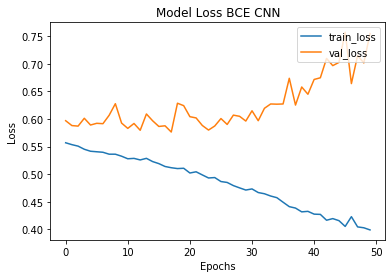

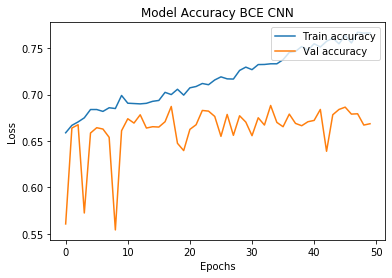

In [42]:
hist=model.fit(x_train, y_train, batch_size=64, epochs=50, verbose=1, class_weight=class_weights, validation_data=(x_val,y_val))
plt.plot(hist.history['loss'],label="train_loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.title("Model Loss BCE CNN") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist.history['acc'],label="Train accuracy" )
plt.plot(hist.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy BCE CNN") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

                Precision raw  Recall raw    F1 raw  F1 weighted  F1 macro  \
False Positive       0.768414    0.688864  0.726468     0.673431   0.65303   
Confirmed            0.534728    0.632673  0.579592     0.673431   0.65303   

                F1 micro  
False Positive  0.668573  
Confirmed       0.668573  


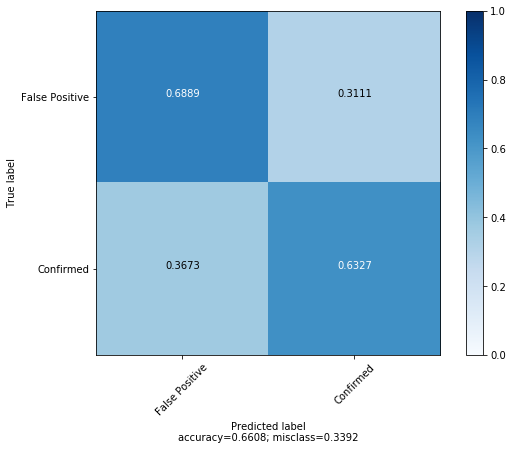

{'Precision raw': array([0.76841448, 0.53472803]), 'Recall raw': array([0.68886402, 0.63267327]), 'F1 raw': array([0.72646798, 0.57959184]), 'F1 weighted': 0.6734308343520711, 'F1 macro': 0.6530299106954673, 'F1 micro': 0.6685734715766893, 'Confusion Matrix': array([[1231,  556],
       [ 371,  639]])}


In [44]:
predichos=model.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 50 epochs CNN + reverse LC'))

Train on 8383 samples, validate on 2797 samples
Epoch 1/50
8383/8383 [==============================] - 3s 397us/step - loss: 0.5723 - acc: 0.6442 - val_loss: 0.6115 - val_acc: 0.5438
Epoch 2/50
8383/8383 [==============================] - 3s 318us/step - loss: 0.5614 - acc: 0.6591 - val_loss: 0.6218 - val_acc: 0.5427
Epoch 3/50
8383/8383 [==============================] - 3s 316us/step - loss: 0.5565 - acc: 0.6600 - val_loss: 0.6182 - val_acc: 0.5488
Epoch 4/50
8383/8383 [==============================] - 2s 293us/step - loss: 0.5556 - acc: 0.6648 - val_loss: 0.6140 - val_acc: 0.5556
Epoch 5/50
8383/8383 [==============================] - 2s 290us/step - loss: 0.5581 - acc: 0.6644 - val_loss: 0.6023 - val_acc: 0.5620
Epoch 6/50
8383/8383 [==============================] - 2s 292us/step - loss: 0.5556 - acc: 0.6667 - val_loss: 0.6118 - val_acc: 0.5520
Epoch 7/50
8383/8383 [==============================] - 2s 289us/step - loss: 0.5477 - acc: 0.6675 - val_loss: 0.6174 - val_acc: 0.6182


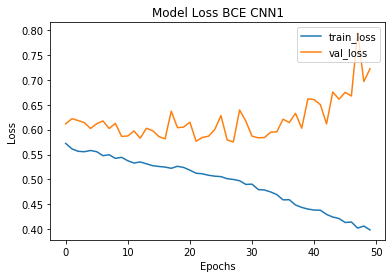

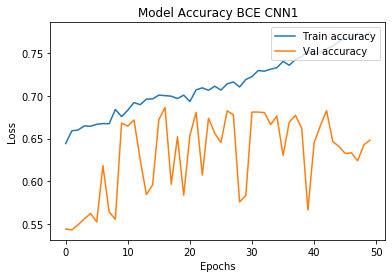

In [45]:
hist1=model1.fit(x_train, y_train, batch_size=64, epochs=50, verbose=1, class_weight=class_weights, validation_data=(x_val,y_val))
plt.plot(hist1.history['loss'],label="train_loss")
plt.plot(hist1.history['val_loss'],label="val_loss")
plt.title("Model Loss BCE CNN1") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist1.history['acc'],label="Train accuracy" )
plt.plot(hist1.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy BCE CNN1") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

                Precision raw  Recall raw    F1 raw  F1 weighted  F1 macro  \
False Positive       0.787402    0.615557  0.690955     0.655114  0.641328   
Confirmed            0.509286    0.705941  0.591701     0.655114  0.641328   

                F1 micro  
False Positive  0.648194  
Confirmed       0.648194  


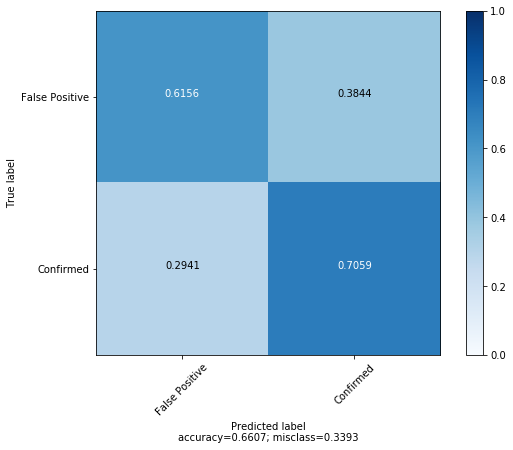

{'Precision raw': array([0.78740157, 0.50928571]), 'Recall raw': array([0.6155568 , 0.70594059]), 'F1 raw': array([0.69095477, 0.59170124]), 'F1 weighted': 0.6551142074243596, 'F1 macro': 0.6413280093413124, 'F1 micro': 0.6481944941008223, 'Confusion Matrix': array([[1100,  687],
       [ 297,  713]])}


In [46]:
predichos=model1.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 50 epochs CNN 1 + Reverse LC'))

In [47]:
def focal_loss(gamma=2., weights=1):   #weights np.asarray()
    weights= K.variable(weights)
    def focal_loss_fixed(y_true, y_pred):
        y_true = K.clip(y_true, K.epsilon(),1)
        y_pred = K.clip(y_pred,K.epsilon(),1)
        return - K.sum(weights* K.pow(1. - y_pred, gamma)* y_true * K.log(y_pred), axis=-1) 
    return focal_loss_fixed

In [48]:
model2 = Sequential()
model2.add(Conv2D(64, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.1))
model2.add(Conv2D(128, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model2.add(Conv2D(256, (3, 3), strides=(1, 1), activation="relu", padding="same"))
#model1.add(Flatten())
model2.add(GlobalAveragePooling2D())
model2.add(Dense(256,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(2, activation='softmax'))
model2.summary()

model2.compile(loss=focal_loss(2,weights=class_weights),optimizer='adam',metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 15, 15, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
global_average_pooling2d_3 ( (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
__________

In [49]:
y_train_cat=to_categorical(y_train, 2)
y_train_cat[:3]
y_val_cat=to_categorical(y_val, 2)
y_val_cat[:3]

array([[0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

Train on 8383 samples, validate on 2797 samples
Epoch 1/50
8383/8383 [==============================] - 3s 380us/step - loss: 0.1458 - acc: 0.6523 - val_loss: 0.1557 - val_acc: 0.5388
Epoch 2/50
8383/8383 [==============================] - 2s 298us/step - loss: 0.1450 - acc: 0.6487 - val_loss: 0.1665 - val_acc: 0.5080
Epoch 3/50
8383/8383 [==============================] - 2s 292us/step - loss: 0.1429 - acc: 0.6526 - val_loss: 0.1576 - val_acc: 0.5463
Epoch 4/50
8383/8383 [==============================] - 2s 288us/step - loss: 0.1414 - acc: 0.6598 - val_loss: 0.1601 - val_acc: 0.5223
Epoch 5/50
8383/8383 [==============================] - 2s 287us/step - loss: 0.1410 - acc: 0.6595 - val_loss: 0.1550 - val_acc: 0.5509
Epoch 6/50
8383/8383 [==============================] - 2s 289us/step - loss: 0.1407 - acc: 0.6603 - val_loss: 0.1538 - val_acc: 0.5424
Epoch 7/50
8383/8383 [==============================] - 2s 291us/step - loss: 0.1397 - acc: 0.6650 - val_loss: 0.1601 - val_acc: 0.5184


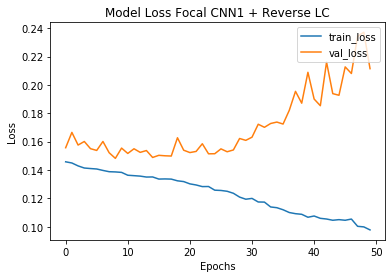

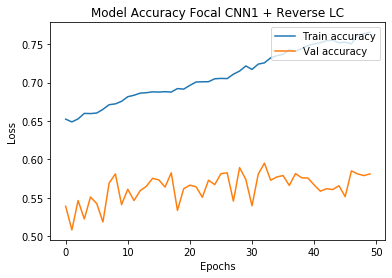

In [50]:
hist2=model2.fit(x_train, y_train_cat, batch_size=64, epochs=50, verbose=1, class_weight=class_weights, validation_data=(x_val,y_val_cat))
plt.plot(hist2.history['loss'],label="train_loss")
plt.plot(hist2.history['val_loss'],label="val_loss")
plt.title("Model Loss Focal CNN1 + Reverse LC") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist2.history['acc'],label="Train accuracy" )
plt.plot(hist2.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy Focal CNN1 + Reverse LC") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

                Precision raw  Recall raw    F1 raw  F1 weighted  F1 macro  \
False Positive       0.849035    0.418579  0.560720     0.574706  0.580086   
Confirmed            0.457724    0.868317  0.599453     0.574706  0.580086   

                F1 micro  
False Positive   0.58098  
Confirmed        0.58098  


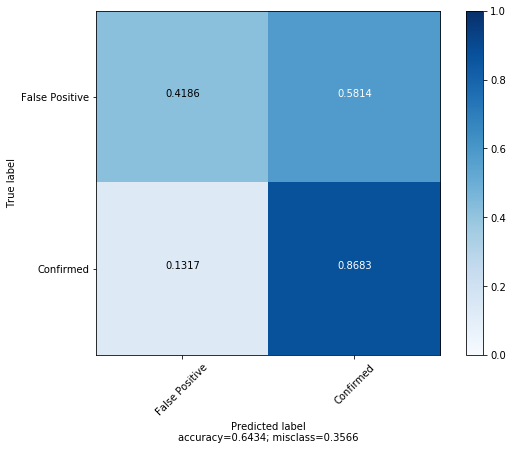

{'Precision raw': array([0.84903519, 0.45772443]), 'Recall raw': array([0.41857862, 0.86831683]), 'F1 raw': array([0.56071964, 0.59945318]), 'F1 weighted': 0.574706366530587, 'F1 macro': 0.5800864092902285, 'F1 micro': 0.5809796210225241, 'Confusion Matrix': array([[ 748, 1039],
       [ 133,  877]])}


In [51]:
predichos=model2.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 50 epochs CNN 1 Focal + Reverse LC'))

# Segundo Modelo

In [52]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model3.add(Dropout(0.25))
model3.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model3.add(Dropout(0.15))
model3.add(GlobalAveragePooling2D())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

model3.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 15, 15, 32)        320       
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 32)        9248      
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
global_average_pooling2d_4 ( (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
__________

In [53]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model4.add(Dropout(0.2))
model4.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model4.add(Dropout(0.1))
model4.add(GlobalAveragePooling2D())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(2, activation='softmax'))
model4.summary()
model4.compile(loss=focal_loss(2,weights=class_weights),optimizer='adam',metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 15, 15, 32)        320       
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 32)        9248      
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
global_average_pooling2d_5 ( (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
__________

Train on 8383 samples, validate on 2797 samples
Epoch 1/100
8383/8383 [==============================] - 2s 289us/step - loss: 0.5916 - acc: 0.6328 - val_loss: 0.6172 - val_acc: 0.5567
Epoch 2/100
8383/8383 [==============================] - 2s 206us/step - loss: 0.5566 - acc: 0.6609 - val_loss: 0.6278 - val_acc: 0.5463
Epoch 3/100
8383/8383 [==============================] - 2s 208us/step - loss: 0.5572 - acc: 0.6628 - val_loss: 0.6391 - val_acc: 0.5281
Epoch 4/100
8383/8383 [==============================] - 2s 208us/step - loss: 0.5562 - acc: 0.6592 - val_loss: 0.6097 - val_acc: 0.5492
Epoch 5/100
8383/8383 [==============================] - 2s 183us/step - loss: 0.5552 - acc: 0.6618 - val_loss: 0.6089 - val_acc: 0.5477
Epoch 6/100
8383/8383 [==============================] - 2s 182us/step - loss: 0.5543 - acc: 0.6622 - val_loss: 0.6103 - val_acc: 0.5599
Epoch 7/100
8383/8383 [==============================] - 2s 179us/step - loss: 0.5530 - acc: 0.6616 - val_loss: 0.6055 - val_acc: 

8383/8383 [==============================] - 1s 174us/step - loss: 0.5209 - acc: 0.6939 - val_loss: 0.5976 - val_acc: 0.6754
Epoch 61/100
8383/8383 [==============================] - 1s 175us/step - loss: 0.5165 - acc: 0.7043 - val_loss: 0.5857 - val_acc: 0.5888
Epoch 62/100
8383/8383 [==============================] - 1s 175us/step - loss: 0.5196 - acc: 0.6970 - val_loss: 0.6065 - val_acc: 0.5731
Epoch 63/100
8383/8383 [==============================] - 1s 176us/step - loss: 0.5165 - acc: 0.6992 - val_loss: 0.5778 - val_acc: 0.6925
Epoch 64/100
8383/8383 [==============================] - 1s 176us/step - loss: 0.5143 - acc: 0.7045 - val_loss: 0.5819 - val_acc: 0.6797
Epoch 65/100
8383/8383 [==============================] - 1s 176us/step - loss: 0.5165 - acc: 0.7024 - val_loss: 0.5961 - val_acc: 0.6689
Epoch 66/100
8383/8383 [==============================] - 1s 176us/step - loss: 0.5144 - acc: 0.6996 - val_loss: 0.6088 - val_acc: 0.6696
Epoch 67/100
8383/8383 [=======================

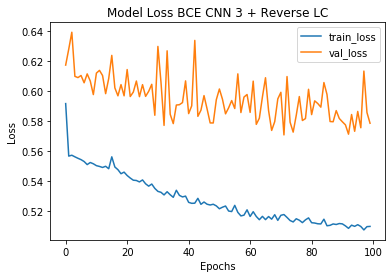

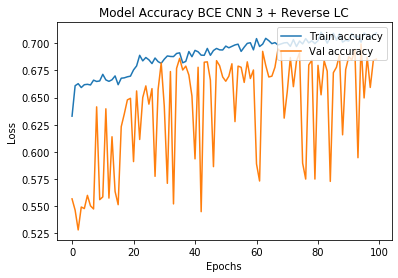

                Precision raw  Recall raw    F1 raw  F1 weighted  F1 macro  \
False Positive       0.767236    0.728595  0.747417     0.688023  0.665178   
Confirmed            0.559091    0.608911  0.582938     0.688023  0.665178   

                F1 micro  
False Positive  0.685377  
Confirmed       0.685377  


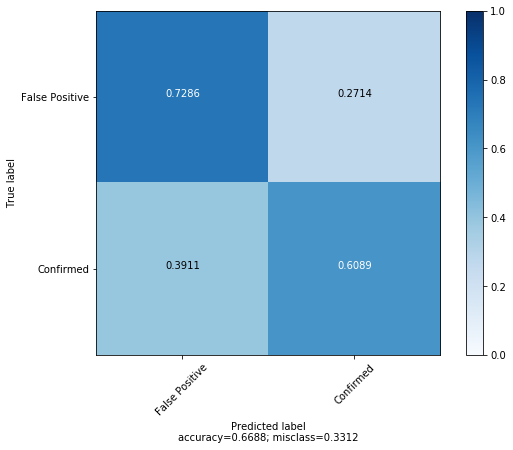

{'Precision raw': array([0.7672363 , 0.55909091]), 'Recall raw': array([0.72859541, 0.60891089]), 'F1 raw': array([0.74741676, 0.58293839]), 'F1 weighted': 0.6880234275356611, 'F1 macro': 0.6651775754838638, 'F1 micro': 0.6853771898462638, 'Confusion Matrix': array([[1302,  485],
       [ 395,  615]])}


In [54]:
hist3=model3.fit(x_train, y_train, batch_size=64, epochs=100, verbose=1, class_weight=class_weights, validation_data=(x_val,y_val))
plt.plot(hist3.history['loss'],label="train_loss")
plt.plot(hist3.history['val_loss'],label="val_loss")
plt.title("Model Loss BCE CNN 3 + Reverse LC") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist3.history['acc'],label="Train accuracy" )
plt.plot(hist3.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy BCE CNN 3 + Reverse LC") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

predichos=model3.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 50 epochs CNN 3 BCE + Reverse LC'))

Train on 8383 samples, validate on 2797 samples
Epoch 1/100
8383/8383 [==============================] - 2s 284us/step - loss: 0.1482 - acc: 0.6480 - val_loss: 0.1574 - val_acc: 0.5341
Epoch 2/100
8383/8383 [==============================] - 2s 218us/step - loss: 0.1425 - acc: 0.6547 - val_loss: 0.1566 - val_acc: 0.5574
Epoch 3/100
8383/8383 [==============================] - 2s 199us/step - loss: 0.1423 - acc: 0.6557 - val_loss: 0.1572 - val_acc: 0.5227
Epoch 4/100
8383/8383 [==============================] - 2s 181us/step - loss: 0.1417 - acc: 0.6526 - val_loss: 0.1543 - val_acc: 0.5467
Epoch 5/100
8383/8383 [==============================] - 1s 179us/step - loss: 0.1414 - acc: 0.6568 - val_loss: 0.1537 - val_acc: 0.5420
Epoch 6/100
8383/8383 [==============================] - 2s 180us/step - loss: 0.1414 - acc: 0.6567 - val_loss: 0.1581 - val_acc: 0.5341
Epoch 7/100
8383/8383 [==============================] - 2s 180us/step - loss: 0.1409 - acc: 0.6621 - val_loss: 0.1572 - val_acc: 

8383/8383 [==============================] - 2s 209us/step - loss: 0.1320 - acc: 0.6958 - val_loss: 0.1495 - val_acc: 0.5863
Epoch 61/100
8383/8383 [==============================] - 2s 210us/step - loss: 0.1327 - acc: 0.6928 - val_loss: 0.1482 - val_acc: 0.5863
Epoch 62/100
8383/8383 [==============================] - 2s 206us/step - loss: 0.1323 - acc: 0.6938 - val_loss: 0.1496 - val_acc: 0.5849
Epoch 63/100
8383/8383 [==============================] - 2s 208us/step - loss: 0.1316 - acc: 0.6956 - val_loss: 0.1571 - val_acc: 0.5474
Epoch 64/100
8383/8383 [==============================] - 2s 207us/step - loss: 0.1314 - acc: 0.6931 - val_loss: 0.1504 - val_acc: 0.5724
Epoch 65/100
8383/8383 [==============================] - 2s 207us/step - loss: 0.1314 - acc: 0.6956 - val_loss: 0.1514 - val_acc: 0.5799
Epoch 66/100
8383/8383 [==============================] - 2s 210us/step - loss: 0.1316 - acc: 0.6932 - val_loss: 0.1513 - val_acc: 0.5656
Epoch 67/100
8383/8383 [=======================

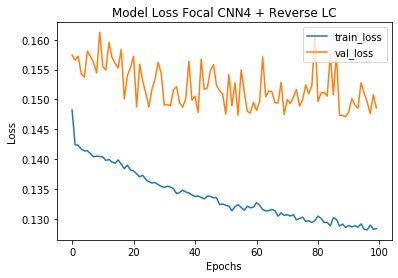

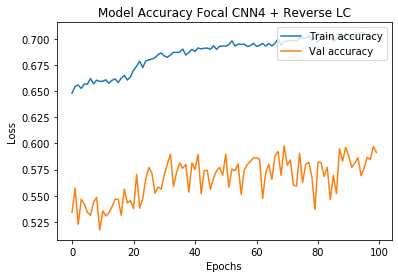

                Precision raw  Recall raw    F1 raw  F1 weighted  F1 macro  \
False Positive       0.869266    0.424175  0.570139     0.584736  0.590351   
Confirmed            0.465455    0.887129  0.610562     0.584736  0.590351   

                F1 micro  
False Positive  0.591348  
Confirmed       0.591348  


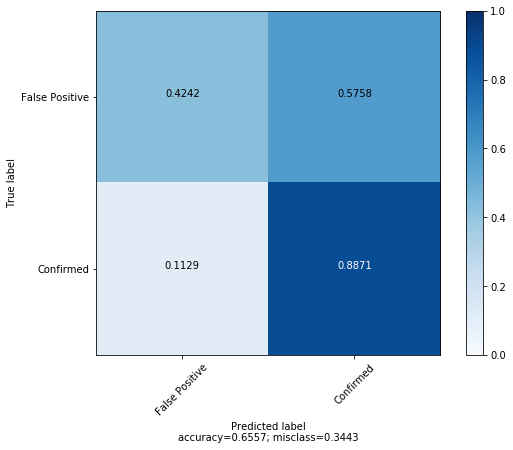

{'Precision raw': array([0.86926606, 0.46545455]), 'Recall raw': array([0.42417459, 0.88712871]), 'F1 raw': array([0.57013915, 0.61056218]), 'F1 weighted': 0.5847359540707248, 'F1 macro': 0.5903506653178143, 'F1 micro': 0.5913478727207723, 'Confusion Matrix': array([[ 758, 1029],
       [ 114,  896]])}


In [55]:
hist4=model4.fit(x_train, y_train_cat, batch_size=64, epochs=100, verbose=1, class_weight=class_weights, validation_data=(x_val,y_val_cat))
plt.plot(hist4.history['loss'],label="train_loss")
plt.plot(hist4.history['val_loss'],label="val_loss")
plt.title("Model Loss Focal CNN4 + Reverse LC") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist4.history['acc'],label="Train accuracy" )
plt.plot(hist4.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy Focal CNN4 + Reverse LC") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

predichos=model4.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 50 epochs CNN 1 Focal + Reverse LC'))

Train on 8383 samples, validate on 2797 samples
Epoch 1/50
8383/8383 [==============================] - 1s 126us/step - loss: 0.5063 - acc: 0.7063 - val_loss: 0.5849 - val_acc: 0.6757
Epoch 2/50
8383/8383 [==============================] - 1s 116us/step - loss: 0.5024 - acc: 0.7137 - val_loss: 0.5810 - val_acc: 0.6857
Epoch 3/50
8383/8383 [==============================] - 1s 118us/step - loss: 0.5038 - acc: 0.7114 - val_loss: 0.5781 - val_acc: 0.6897
Epoch 4/50
8383/8383 [==============================] - 1s 115us/step - loss: 0.5061 - acc: 0.7113 - val_loss: 0.5775 - val_acc: 0.6915
Epoch 5/50
8383/8383 [==============================] - 1s 116us/step - loss: 0.5039 - acc: 0.7128 - val_loss: 0.5779 - val_acc: 0.6918
Epoch 6/50
8383/8383 [==============================] - 1s 117us/step - loss: 0.5048 - acc: 0.7104 - val_loss: 0.5882 - val_acc: 0.6793
Epoch 7/50
8383/8383 [==============================] - 1s 114us/step - loss: 0.5039 - acc: 0.7133 - val_loss: 0.5772 - val_acc: 0.6890


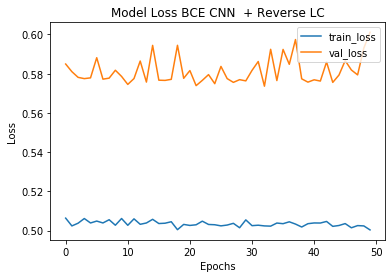

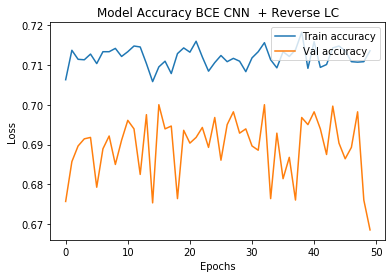

                Precision raw  Recall raw    F1 raw  F1 weighted  F1 macro  \
False Positive       0.778859    0.672076  0.721538     0.674303  0.656133   
Confirmed            0.533068    0.662376  0.590728     0.674303  0.656133   

                F1 micro  
False Positive  0.668573  
Confirmed       0.668573  


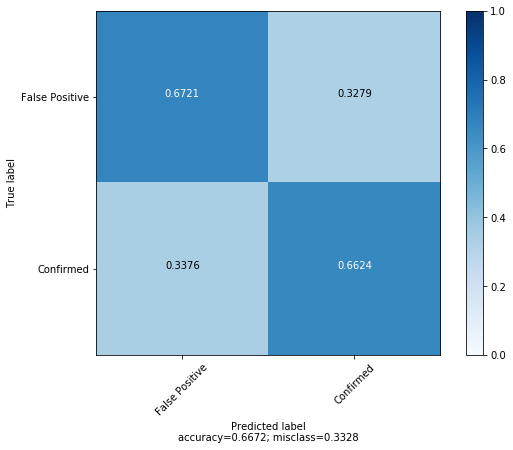

{'Precision raw': array([0.77885863, 0.53306773]), 'Recall raw': array([0.67207611, 0.66237624]), 'F1 raw': array([0.721538  , 0.59072848]), 'F1 weighted': 0.6743025264625702, 'F1 macro': 0.6561332381102056, 'F1 micro': 0.6685734715766893, 'Confusion Matrix': array([[1201,  586],
       [ 341,  669]])}


In [59]:
#mini-batches ?
hist3=model3.fit(x_train, y_train, batch_size=256 , epochs=50, verbose=1, class_weight=class_weights, validation_data=(x_val,y_val))
plt.plot(hist3.history['loss'],label="train_loss")
plt.plot(hist3.history['val_loss'],label="val_loss")
plt.title("Model Loss BCE CNN  + Reverse LC") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist3.history['acc'],label="Train accuracy" )
plt.plot(hist3.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy BCE CNN  + Reverse LC") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

predichos=model3.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 50 epochs CNN BCE + Reverse LC'))

                Precision raw  Recall raw    F1 raw  F1 weighted  F1 macro  \
False Positive       0.755663    0.745808  0.750703     0.714859  0.708406   
Confirmed            0.660304    0.672016  0.666109     0.714859  0.708406   

                F1 micro  
False Positive  0.714541  
Confirmed       0.714541  


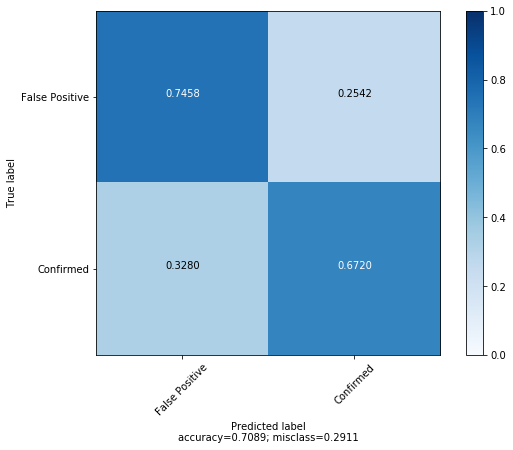

{'Precision raw': array([0.75566275, 0.66030429]), 'Recall raw': array([0.74580832, 0.67201577]), 'F1 raw': array([0.7507032 , 0.66610855]), 'F1 weighted': 0.7148592068856634, 'F1 macro': 0.7084058756701858, 'F1 micro': 0.7145413336514375, 'Confusion Matrix': array([[3603, 1228],
       [1165, 2387]])}


In [61]:
predichos=model3.predict_classes(x_train)
print (calculate_metrics(y_train,predichos,'[TRAIN] Confusion Matrix 50 epochs CNN BCE + Reverse LC'))

## modificar completamente los modelos!

In [62]:
model5 = Sequential()
model5.add(Conv2D(16, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model5.add(BatchNormalization())
model5.add(Conv2D(16, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2,2)))
model5.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model5.add(BatchNormalization())
model5.add(GlobalAveragePooling2D())
model5.add(Dropout(0.25))
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(2, activation='softmax'))
model5.summary()
model5.compile(loss=focal_loss(2,weights=class_weights),optimizer='adam',metrics=['acc'])

W0719 03:48:41.826738 140316414314304 deprecation_wrapper.py:119] From /users/mbugueno/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 15, 15, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 16)        64        
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 15, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 32)          128       
__________

Train on 8383 samples, validate on 2797 samples
Epoch 1/50
8383/8383 [==============================] - 2s 207us/step - loss: 0.1468 - acc: 0.6400 - val_loss: 0.5826 - val_acc: 0.6257
Epoch 2/50
8383/8383 [==============================] - 2s 198us/step - loss: 0.1408 - acc: 0.6653 - val_loss: 0.4107 - val_acc: 0.5638
Epoch 3/50
8383/8383 [==============================] - 2s 197us/step - loss: 0.1372 - acc: 0.6786 - val_loss: 0.1736 - val_acc: 0.6282
Epoch 4/50
8383/8383 [==============================] - 2s 197us/step - loss: 0.1355 - acc: 0.6827 - val_loss: 0.1637 - val_acc: 0.5692
Epoch 5/50
8383/8383 [==============================] - 2s 196us/step - loss: 0.1344 - acc: 0.6883 - val_loss: 0.1523 - val_acc: 0.5856
Epoch 6/50
8383/8383 [==============================] - 2s 196us/step - loss: 0.1315 - acc: 0.6965 - val_loss: 0.1561 - val_acc: 0.5810
Epoch 7/50
8383/8383 [==============================] - 2s 200us/step - loss: 0.1296 - acc: 0.6972 - val_loss: 0.1600 - val_acc: 0.5345


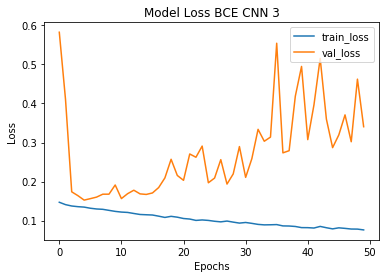

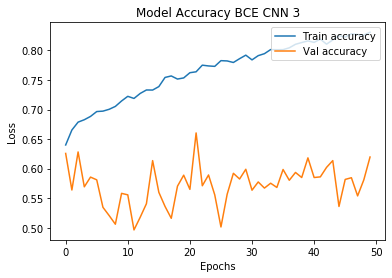

                Precision raw  Recall raw    F1 raw  F1 weighted  F1 macro  \
False Positive       0.727216    0.647454  0.685021     0.625379  0.602438   
Confirmed            0.477612    0.570297  0.519856     0.625379  0.602438   

                F1 micro  
False Positive  0.619592  
Confirmed       0.619592  


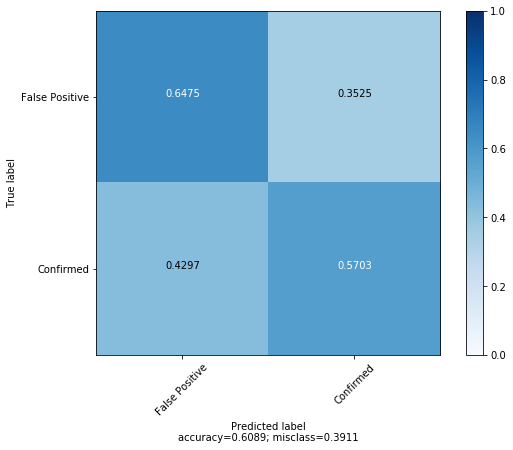

{'Precision raw': array([0.72721559, 0.47761194]), 'Recall raw': array([0.64745383, 0.57029703]), 'F1 raw': array([0.68502072, 0.5198556 ]), 'F1 weighted': 0.6253794002188048, 'F1 macro': 0.602438158994385, 'F1 micro': 0.6195924204504827, 'Confusion Matrix': array([[1157,  630],
       [ 434,  576]])}


In [66]:
hist5=model5.fit(x_train, y_train_cat, batch_size=256, epochs=50, verbose=1, class_weight=class_weights, validation_data=(x_val,y_val_cat))
plt.plot(hist5.history['loss'],label="train_loss")
plt.plot(hist5.history['val_loss'],label="val_loss")
plt.title("Model Loss BCE CNN 3") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()
plt.plot(hist5.history['acc'],label="Train accuracy" )
plt.plot(hist5.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy BCE CNN 3") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()
predichos=model5.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 100 epochs CNN 5 BCE'))

In [43]:
model6 = Sequential()
model6.add(Conv2D(16, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model6.add(BatchNormalization())
model6.add(Conv2D(16, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2,2)))

model6.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model6.add(BatchNormalization())

model6.add(GlobalAveragePooling2D())
model6.add(Dense(128, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.2))
model6.add(Dense(2, activation='softmax'))
model6.summary()
model6.compile(loss=focal_loss(2,weights=class_weights),optimizer='adam',metrics=['acc'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 15, 15, 16)        160       
_________________________________________________________________
batch_normalization_6 (Batch (None, 15, 15, 16)        64        
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 15, 15, 16)        2320      
_________________________________________________________________
batch_normalization_7 (Batch (None, 15, 15, 16)        64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
batch_normalization_8 (Batch (None, 7, 7, 32)          128       
__________

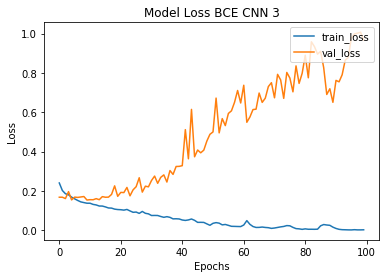

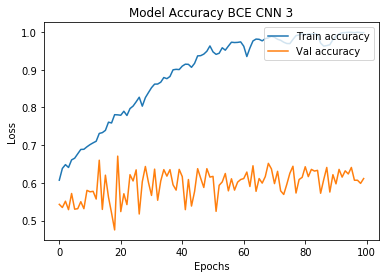

                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.585637  0.611502  0.689162      0.62235       0.752232   
Confirmed       0.585637  0.611502  0.482112      0.62235       0.423019   

                Recall raw  
False Positive    0.635849  
Confirmed         0.560396  


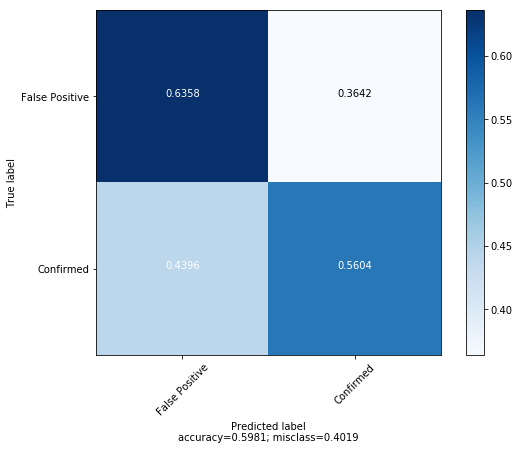

{'F1 macro': 0.5856369951540362, 'Recall raw': array([0.63584906, 0.56039604]), 'Confusion Matrix': array([[674, 386],
       [222, 283]]), 'Precision raw': array([0.75223214, 0.42301943]), 'F1 weighted': 0.6223501774327563, 'F1 micro': 0.6115015974440895, 'F1 raw': array([0.68916155, 0.48211244])}


In [44]:
hist6=model6.fit(x_train, y_train_cat, batch_size=128, epochs=100, verbose=0, class_weight=class_weights, validation_data=(x_val,y_val_cat))
plt.plot(hist6.history['loss'],label="train_loss")
plt.plot(hist6.history['val_loss'],label="val_loss")
plt.title("Model Loss Focal CNN 6") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist6.history['acc'],label="Train accuracy" )
plt.plot(hist6.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy Focal CNN 6") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

predichos=model6.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 100 epochs CNN 6 Focal'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 15, 15, 16)        160       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 15, 15, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 32)          0         
__________

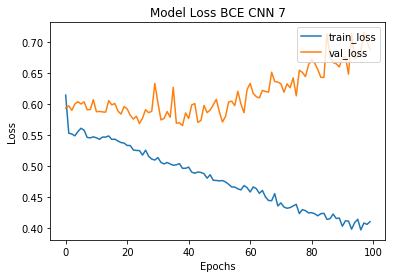

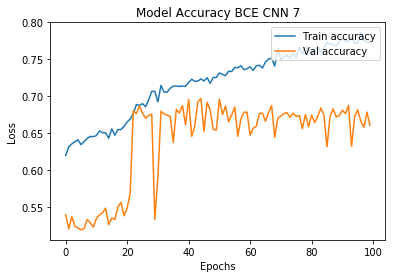

                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.630743  0.660064  0.734796     0.667643       0.779070   
Confirmed       0.630743  0.660064  0.526690     0.667643       0.478191   

                Recall raw  
False Positive    0.695283  
Confirmed         0.586139  


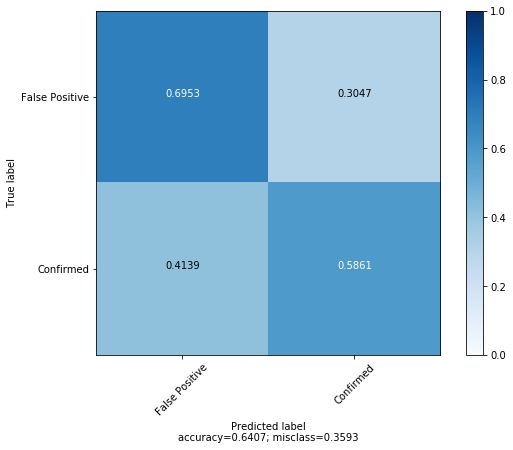

{'F1 macro': 0.6307430023097966, 'Recall raw': array([0.69528302, 0.58613861]), 'Confusion Matrix': array([[737, 323],
       [209, 296]]), 'Precision raw': array([0.77906977, 0.47819063]), 'F1 weighted': 0.6676434489693178, 'F1 micro': 0.6600638977635783, 'F1 raw': array([0.73479561, 0.52669039])}


In [25]:
model7 = Sequential()
model7.add(Conv2D(16, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model7.add(Conv2D(16, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model7.add(MaxPooling2D((2,2)))
model7.add(Dropout(0.25))

#model7.add(Dropout(0.15))
model7.add(Conv2D(32, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model7.add(Conv2D(32, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model7.add(MaxPooling2D((2,2)))
model7.add(Dropout(0.25))

model7.add(Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model7.add(Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"))
#model7.add(MaxPooling2D((2,2)))
model7.add(Dropout(0.25))

model7.add(GlobalAveragePooling2D())
#model7.add(Dropout(0.15))
model7.add(Dense(1, activation='sigmoid'))
model7.summary()

model7.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

hist7=model7.fit(x_train, y_train, batch_size=128, epochs=100, verbose=0, class_weight=class_weights, validation_data=(x_val,y_val))
plt.plot(hist7.history['loss'],label="train_loss")
plt.plot(hist7.history['val_loss'],label="val_loss")
plt.title("Model Loss BCE CNN 7") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist7.history['acc'],label="Train accuracy" )
plt.plot(hist7.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy BCE CNN 7") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

predichos=model7.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 100 epochs CNN 7 BCE'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 15, 15, 32)        320       
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
global_average_pooling2d_5 ( (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
__________

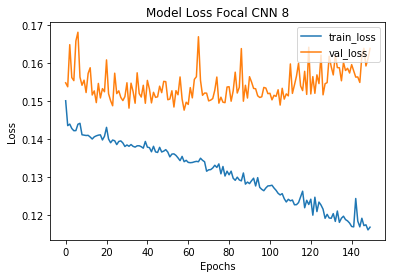

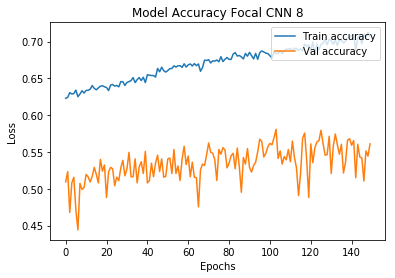

                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.560537  0.561022  0.575139     0.565716       0.834829   
Confirmed       0.560537  0.561022  0.545935     0.565716       0.409722   

                Recall raw  
False Positive    0.438679  
Confirmed         0.817822  


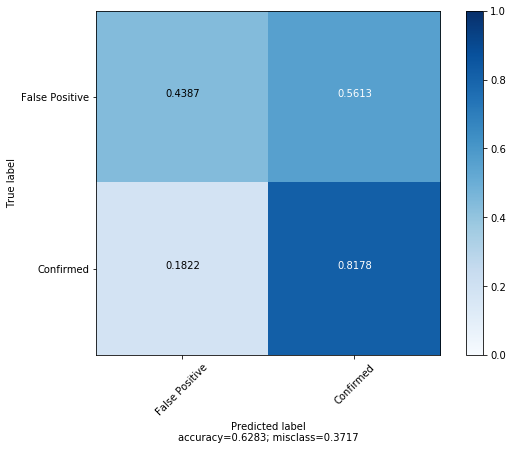

{'F1 macro': 0.5605371872957559, 'Recall raw': array([0.43867925, 0.81782178]), 'Confusion Matrix': array([[465, 595],
       [ 92, 413]]), 'Precision raw': array([0.83482944, 0.40972222]), 'F1 weighted': 0.5657155179001898, 'F1 micro': 0.5610223642172524, 'F1 raw': array([0.57513915, 0.54593523])}


In [21]:
model8 = Sequential()
model8.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model8.add(Dropout(0.15))
model8.add(Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model8.add(Dropout(0.15))
model8.add(Conv2D(128, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model8.add(GlobalAveragePooling2D())
model8.add(Dense(256,activation='relu'))
model8.add(Dropout(0.3))
model8.add(Dense(128, activation='relu'))
model8.add(Dropout(0.15))
model8.add(Dense(2, activation='softmax'))
model8.summary()

model8.compile(loss=focal_loss(2,weights=class_weights),optimizer='adam',metrics=['acc'])

hist8=model8.fit(x_train, y_train_cat, batch_size=128, epochs=150, verbose=0, class_weight=class_weights, validation_data=(x_val,y_val_cat))
plt.plot(hist8.history['loss'],label="train_loss")
plt.plot(hist8.history['val_loss'],label="val_loss")
plt.title("Model Loss Focal CNN 8") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist8.history['acc'],label="Train accuracy" )
plt.plot(hist8.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy Focal CNN 8") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

predichos=model8.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 150 epochs CNN 8 Focal'))

In [28]:
x_train.shape

(4692, 15, 15, 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 15, 32)            1472      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 7, 32)             0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 7, 64)             6208      
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 7, 64)             12352     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 3, 64)             0         
__________

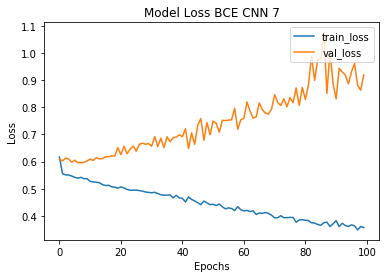

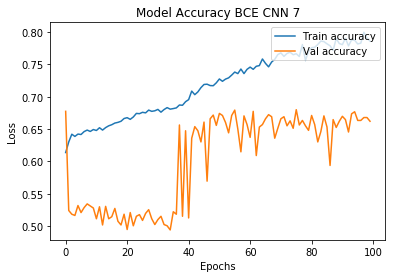

                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.600958  0.661981  0.757005     0.656297       0.737690   
Confirmed       0.600958  0.661981  0.444911     0.656297       0.473214   

                Recall raw  
False Positive    0.777358  
Confirmed         0.419802  


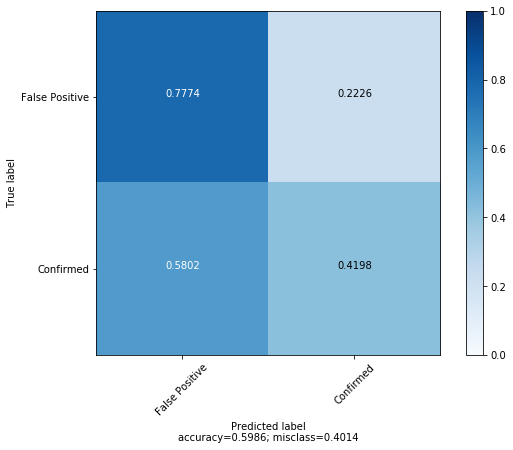

{'F1 macro': 0.6009579303999024, 'Recall raw': array([0.77735849, 0.41980198]), 'Confusion Matrix': array([[824, 236],
       [293, 212]]), 'Precision raw': array([0.73769024, 0.47321429]), 'F1 weighted': 0.6562973252535271, 'F1 micro': 0.6619808306709265, 'F1 raw': array([0.75700505, 0.44491081])}


In [33]:
model9 = Sequential()
model9.add(Conv1D(32, 3, input_shape=(15,15), strides=1,activation="relu", padding="same"))
model9.add(Conv1D(32, 3, strides=1, activation="relu", padding="same"))
model9.add(MaxPooling1D(2))
model9.add(Dropout(0.25))

#model7.add(Dropout(0.15))
model9.add(Conv1D(64, 3, strides=1, activation="relu", padding="same"))
model9.add(Conv1D(64, 3, strides=1, activation="relu", padding="same"))
model9.add(MaxPooling1D(2))
model9.add(Dropout(0.25))

model9.add(Conv1D(128, 3, strides=1, activation="relu", padding="same"))
model9.add(Conv1D(128, 3, strides=1, activation="relu", padding="same"))
#model7.add(MaxPooling2D((2,2)))
model9.add(Dropout(0.25))

model9.add(GlobalAveragePooling1D())
model9.add(Dense(128,activation='relu'))
model9.add(Dropout(0.5))
model9.add(Dense(1, activation='sigmoid'))
model9.summary()

model9.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

hist9=model9.fit(np.squeeze(x_train), y_train, batch_size=128, epochs=100, verbose=0, class_weight=class_weights, validation_data=(np.squeeze(x_val),y_val))
plt.plot(hist9.history['loss'],label="train_loss")
plt.plot(hist9.history['val_loss'],label="val_loss")
plt.title("Model Loss BCE CNN 7") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist9.history['acc'],label="Train accuracy" )
plt.plot(hist9.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy BCE CNN 7") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

predichos=model9.predict_classes(np.squeeze(x_val))
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 100 epochs CNN 9 BCE'))